In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import sys
import seaborn as sns
import brewer2mpl 

### 10. 发散型条形图&文本
如果您想根据单个指标查看项目的变化情况，并可视化此差异的顺序和数量，那么发散条是一个很好的工具。
它有助于快速区分数据中组的性能，并且非常直观，并且可以立即传达这一点。

In [2]:
df = pd.read_excel('mtcars.xlsx')
print(df.shape)
print(df.dtypes)
df.head()

(32, 14)
mpg        float64
cyl          int64
disp       float64
hp           int64
drat       float64
wt         float64
qsec       float64
vs           int64
am           int64
gear         int64
carb         int64
fast         int64
cars        object
carname     object
dtype: object


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


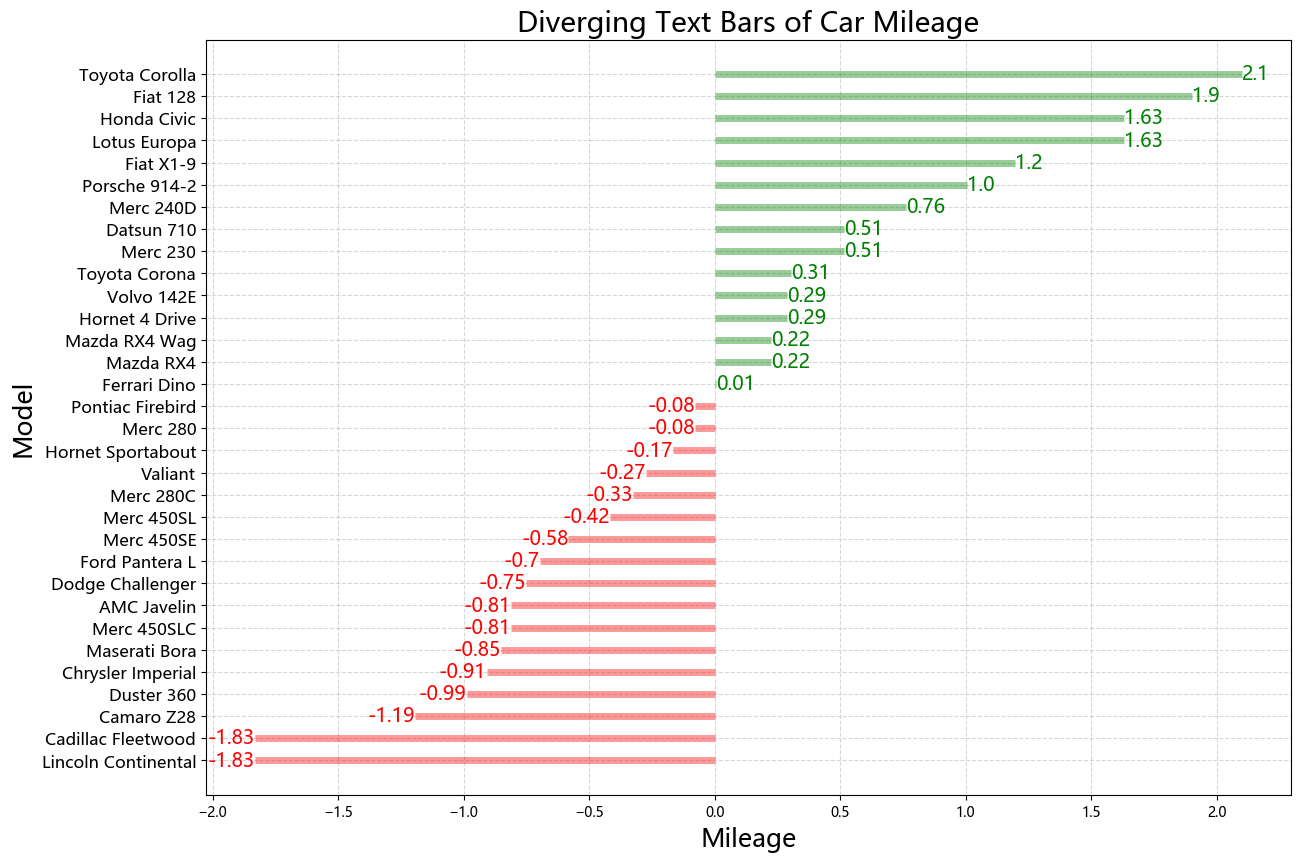

In [6]:
x = df.loc[:,['mpg']]
df[ 'mpg_z' ] = (x - x.mean())/x.std() #再插入一列
df[ 'colors' ] = [ 'red'  if x < 0 else  'green'  for x in df[ 'mpg_z' ]] #再插入一列颜色
df.sort_values( 'mpg_z' , inplace=True)#按照mpg_z进行排列
df.reset_index(inplace=True)#重新设置索引

# Draw plot
plt.figure(figsize=(14,10), dpi= 100)#设置画布和分辨率大小
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment= 'right'  if x < 0 else  'left' , #在条形图上注上数字
                 verticalalignment= 'center' , fontdict={ 'color' : 'red'  if x < 0 else  'green' ,  'size' :14})

# Decorations
plt.gca().set(ylabel= 'Model' , xlabel= 'Mileage' )
plt.yticks(df.index, df.cars, fontsize=12)
plt.ylabel('Model',fontsize=18)         # 坐标轴上的标题和字体大小
plt.xlabel('Mileage',fontsize=18)
plt.title( 'Diverging Text Bars of Car Mileage' , fontsize=20)
plt.grid(linestyle= '--' , alpha=0.5)
plt.show()

### 12. 发散型包点图
发散点图也类似于发散条。然而，与发散条相比，条的不存在减少了组之间的对比度和差异。

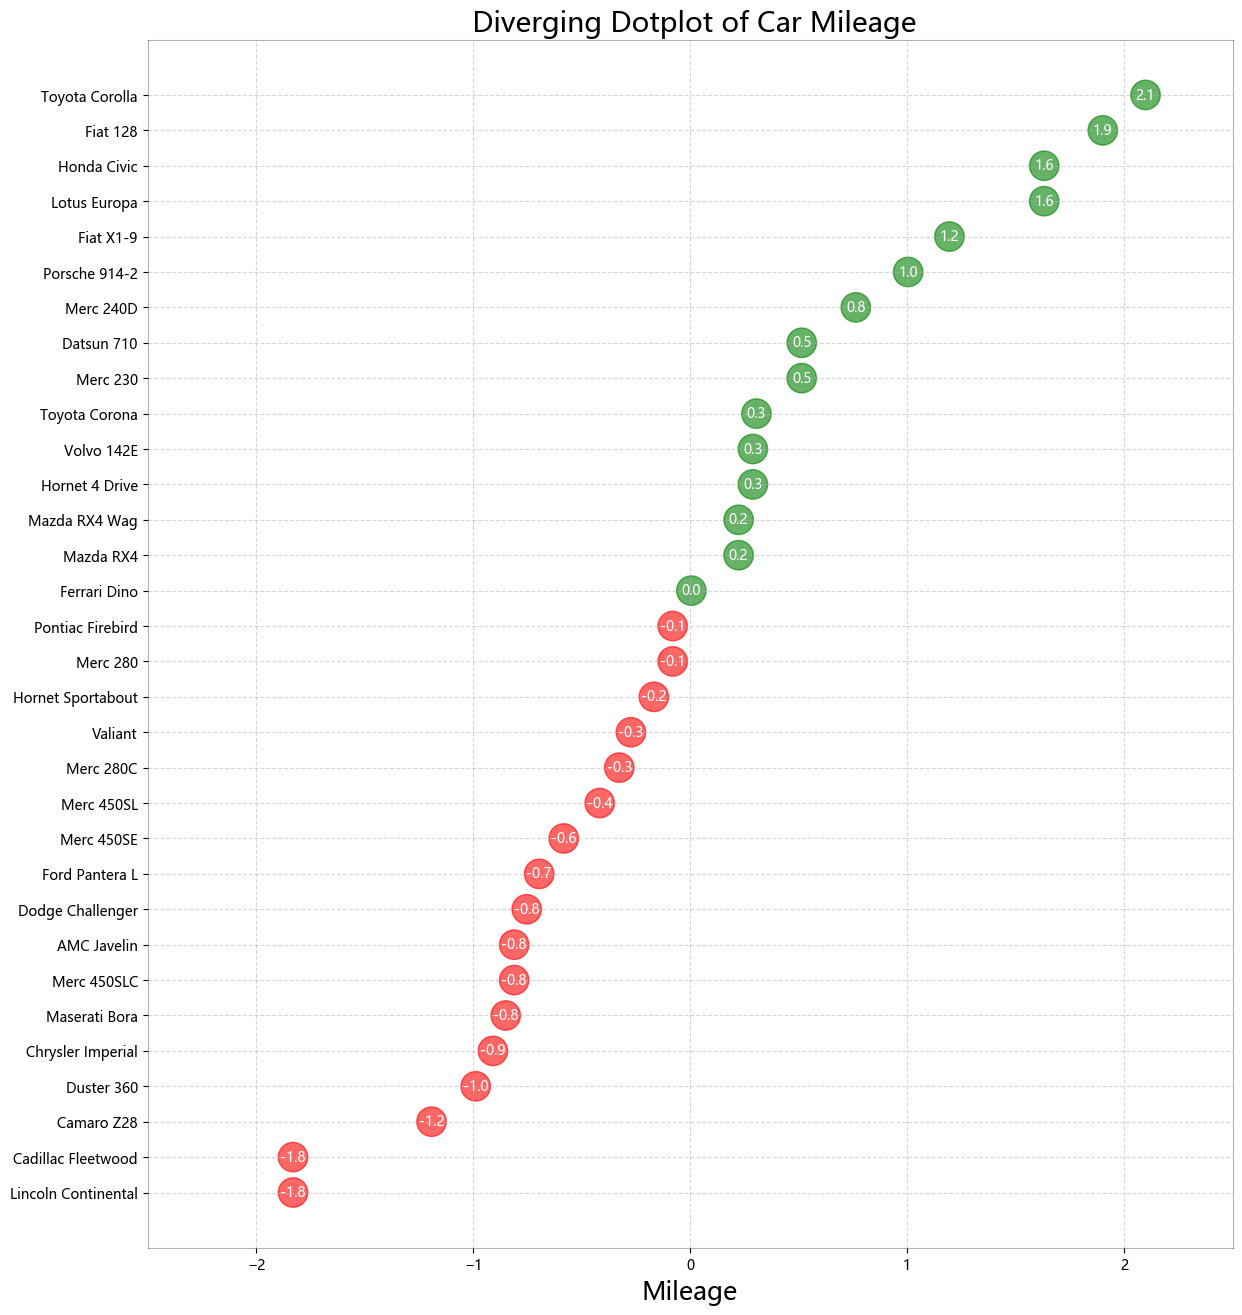

In [10]:
df = pd.read_excel('mtcars.xlsx')
x = df.loc[:,['mpg']]
df[ 'mpg_z' ] = (x - x.mean())/x.std() #再插入一列
df[ 'colors' ] = [ 'red'  if x < 0 else  'green'  for x in df[ 'mpg_z' ]] #再插入一列颜色
df.sort_values( 'mpg_z' , inplace=True)#按照mpg_z进行排列
df.reset_index(inplace=True)#重新设置索引

# Draw plot
plt.figure(figsize=(14,16), dpi= 100)#设置画布和分辨率大小
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment= 'center' , 
                 verticalalignment= 'center' , fontdict={ 'color' : 'white' })
    
# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title(' Diverging Dotplot of Car Mileage' , fontdict={ 'size' :20})
plt.xlabel( 'Mileage',fontsize=18 )
plt.grid(linestyle= '--' , alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 14.面积图
通过对轴和线之间的区域进行着色，区域图不仅强调峰值和低谷，而且还强调高点和低点的持续时间。高点持续时间越长，线下面积越大

In [11]:
import numpy as np
import pandas as pd

# Prepare Data
economicData = pd.read_excel("economics.xlsx", parse_dates=[ 'date' ]).head(100)
print(economicData.shape)
print(economicData.dtypes)
economicData.head()

(100, 6)
date        datetime64[ns]
pce                float64
pop                  int64
psavert            float64
uempmed            float64
unemploy             int64
dtype: object


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


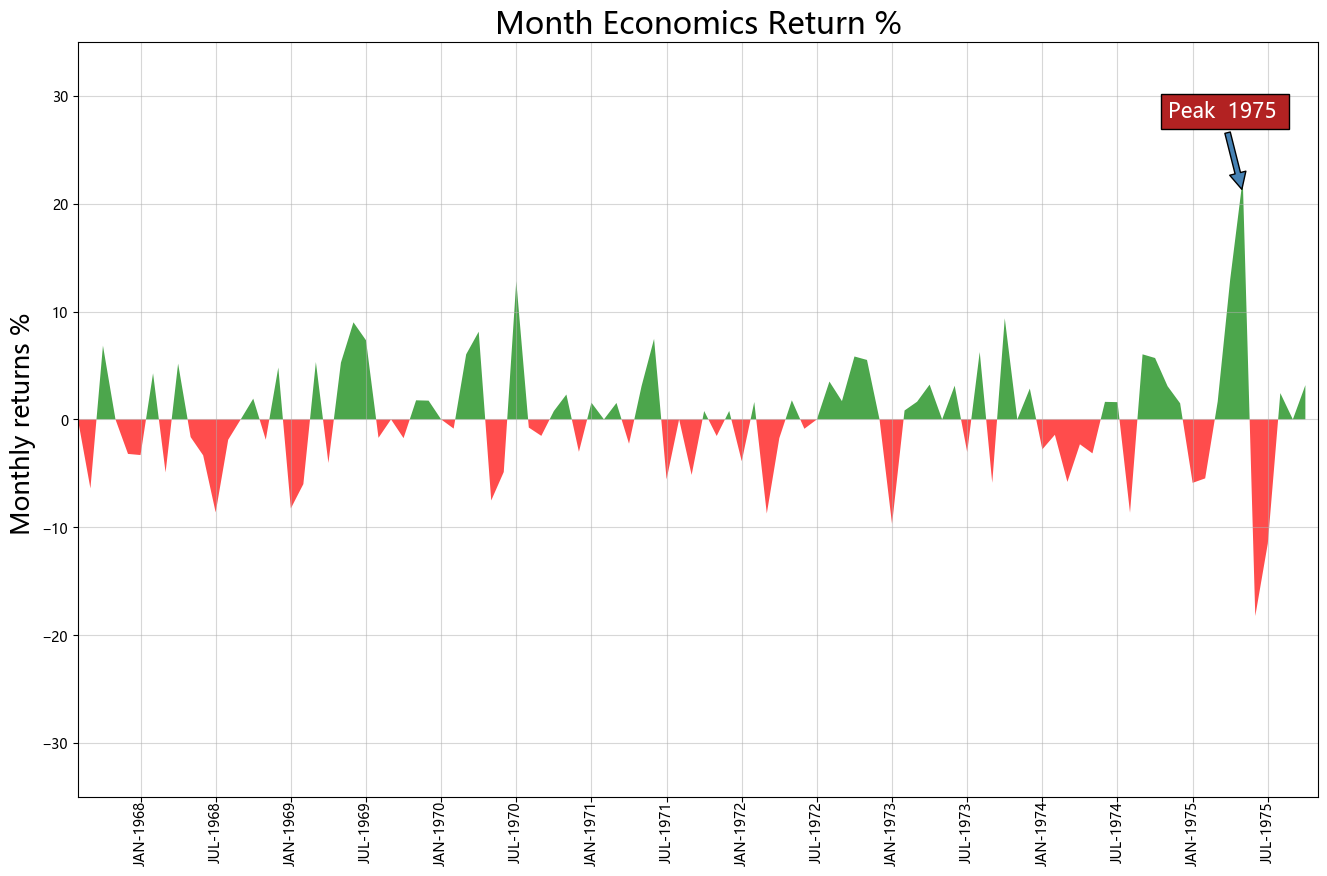

In [23]:
x = np.arange(economicData.shape[0])#np.arange()返回的是ndarray类型；
y_returns = (economicData.psavert.diff().fillna(0)/economicData.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 100)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor= 'green' , interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor= 'red' , interpolate=True, alpha=0.7)

# Annotate
plt.annotate( 'Peak  1975 ', xy =(94.0 , 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle= 'square' , fc= 'firebrick' ),
             arrowprops=dict(facecolor= 'steelblue' , shrink=0.05), fontsize=15, color= 'white' )

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(economicData.date.dt.year, economicData.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={ 'horizontalalignment' :  'center' ,  'verticalalignment' :'center_baseline' })
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel( 'Monthly returns % ',fontsize=18)
plt.grid(alpha=0.5)
plt.show()

### 15. 有序条形图
有序条形图有效地传达了项目的排名顺序。但是，在图表上方添加度量标准的值，用户可以从图表本身获取精确信息。

In [24]:
# Prepare Data
df_raw = pd.read_csv("mpg_ggplot2.csv")
print(df_raw.shape)
print(df_raw.dtypes)
df_raw.head()

(234, 11)
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


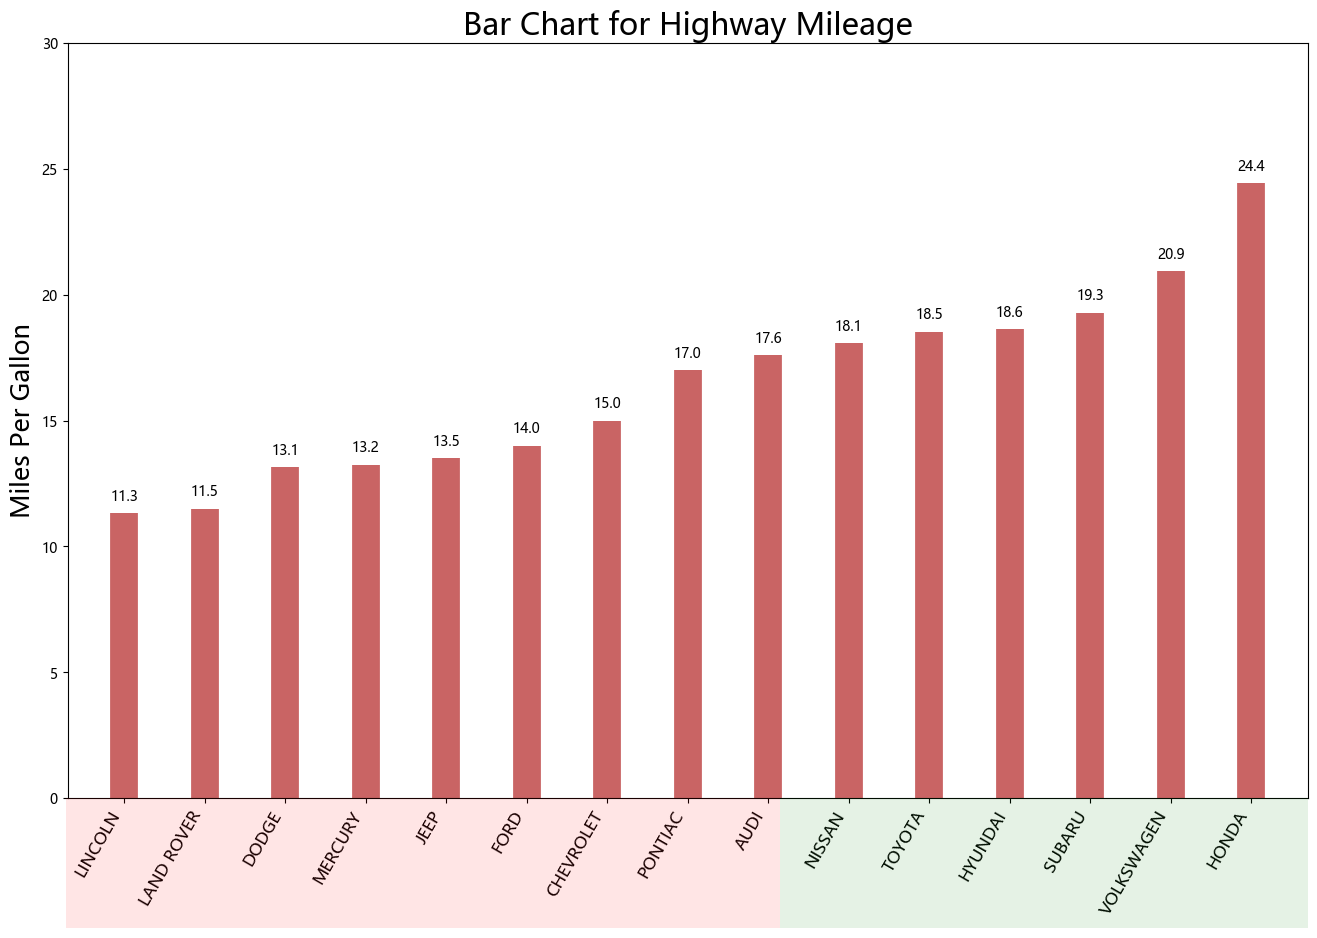

In [32]:
df = df_raw[[ 'cty' ,'manufacturer']].groupby('manufacturer' ).apply(lambda x: x.mean())#按照给的字段划分为若干个分组DataFrame
df.sort_values( 'cty' , inplace=True)#按照‘cty’值排序
df.reset_index(inplace=True)#重新设置索引
# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor= 'white' , dpi= 100)#往后均是对ax坐标系操作
# 绘制柱状图
ax.vlines(x=df.index, #横坐标
          ymin=0,  # 柱状图在y轴的起点
          ymax=df.cty,# 柱状图在y轴的终点
          color= 'firebrick' ,# 柱状图的颜色 
          alpha=0.7, linewidth=20)#柱状图透明度和线宽

# Annotate Text，添加文本
for i, cty in enumerate(df.cty):
    ax.text(i,  # 文本的横坐标位置
            cty+0.5,  # 文本的横坐标位置
            round(cty, 1), # 对文本中数据保留一位小数
            horizontalalignment= 'center' )# 相对于xy轴，水平对齐
    
# Title, Label, Ticks and Ylim
ax.set_title( 'Bar Chart for Highway Mileage' , fontdict={ 'size' :22})
#ax.set(ylabel= 'Miles Per Gallon' , ylim=(0, 30))
plt.ylabel('Miles Per Gallon',fontsize = 18)#每加仑跑的公里数
plt.ylim(0,30)
plt.xticks(df.index,  # 横坐标的刻度位置
           df.manufacturer.str.upper(), # 刻度标尺的内容（先转化为字符串，再转换为大写）
           rotation=60, horizontalalignment= 'right' , fontsize=12)#x轴标尺内容为制造商，福特、吉普、林肯等

# Add patches to color the X axis labels
## 添加绿色的补丁
p1 = patches.Rectangle((0.57, -0.005), # 矩形左下角坐标
                       width=0.33,      # 矩形的宽度
                       height=0.13,     # 矩形的高度
                       alpha=0.1,        # 矩阵的透明度
                       facecolor= 'green' , # 是否填充矩阵(设置为绿色)
                       transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor= 'red' , transform=fig.transFigure)
## 将补丁添加至画布
fig.add_artist(p1) # 获取子图，并且将补丁添加至子图
fig.add_artist(p2)
plt.show()

### 17. 包点图
点图表传达了项目的排名顺序。由于它沿水平轴对齐，因此您可以更容易地看到点彼此之间的距离。

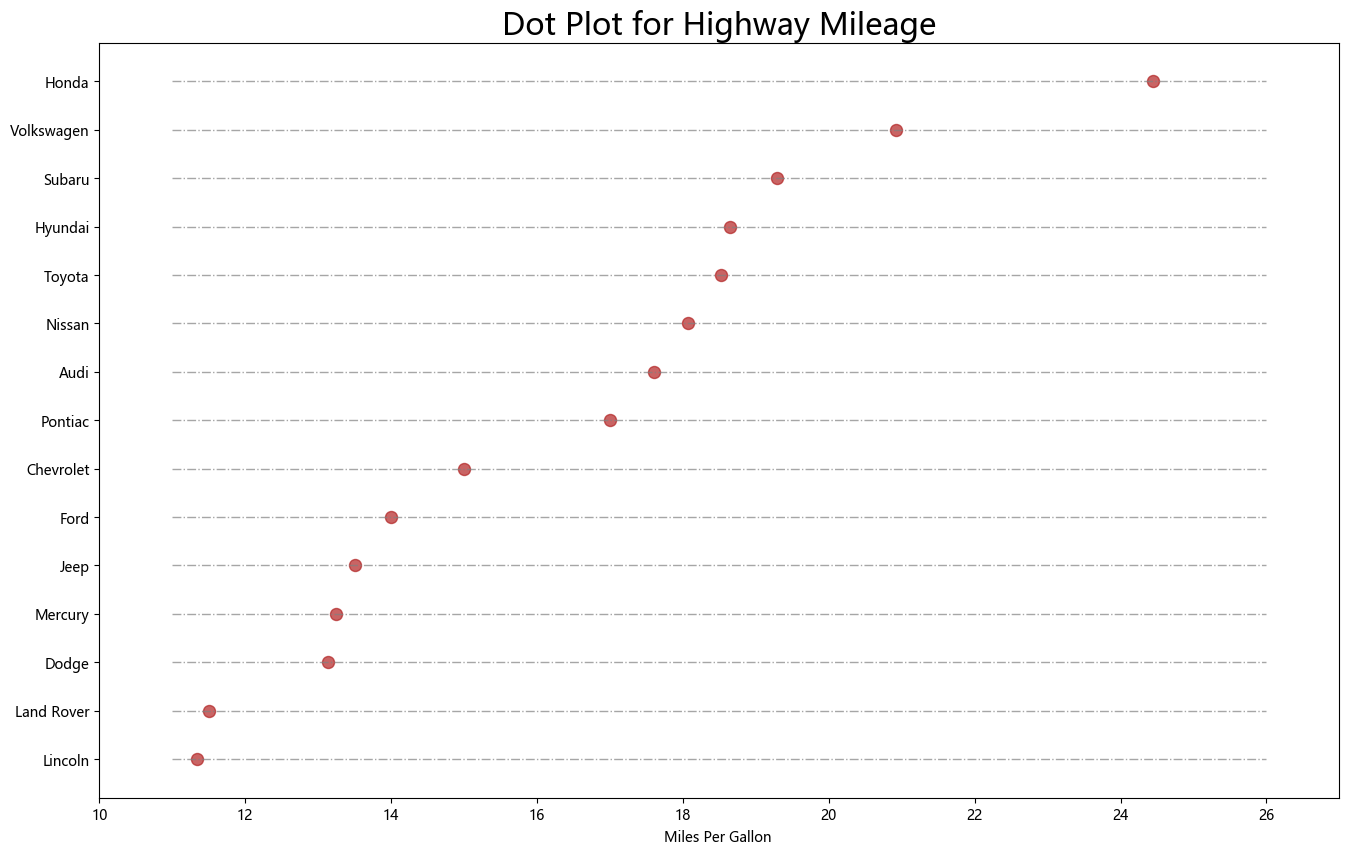

In [35]:
df_raw = pd.read_csv("mpg_ggplot2.csv")
df = df_raw[[ 'cty' ,'manufacturer']].groupby('manufacturer' ).apply(lambda x: x.mean())#按照给的字段划分为若干个分组DataFrame
df.sort_values( 'cty' , inplace=True)#按照‘cty’值排序
df.reset_index(inplace=True)#重新设置索引

fig, ax = plt.subplots(figsize=(16,10), facecolor= 'white' , dpi= 100)#往后均是对ax坐标系操作
#绘制包点图
ax.hlines(y=df.index, #横坐标
          xmin=11,  # 柱状图在y轴的起点
          xmax=26,# 柱状图在y轴的终点
          color= 'gray' ,# 柱状图的颜色 
          alpha=0.7, linewidth=1,linestyles = 'dashdot')#柱状图透明度和线宽
ax.scatter(y=df.index, x=df.cty, s=75, color= 'firebrick' , alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title( 'Dot Plot for Highway Mileage' , fontdict={'size' :22})
ax.set_xlabel( 'Miles Per Gallon ')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={ 'horizontalalignment' :  'right' })
ax.set_xlim(10, 27)
plt.show()

### 18. 坡度图
斜率图最适合比较给定人/项目的“之前”和“之后”位置。

In [36]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_excel("gdppercap.xlsx")
print(df.shape)
print(df.dtypes)
df.head()

(5, 3)
continent     object
1952         float64
1957         float64
dtype: object


,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


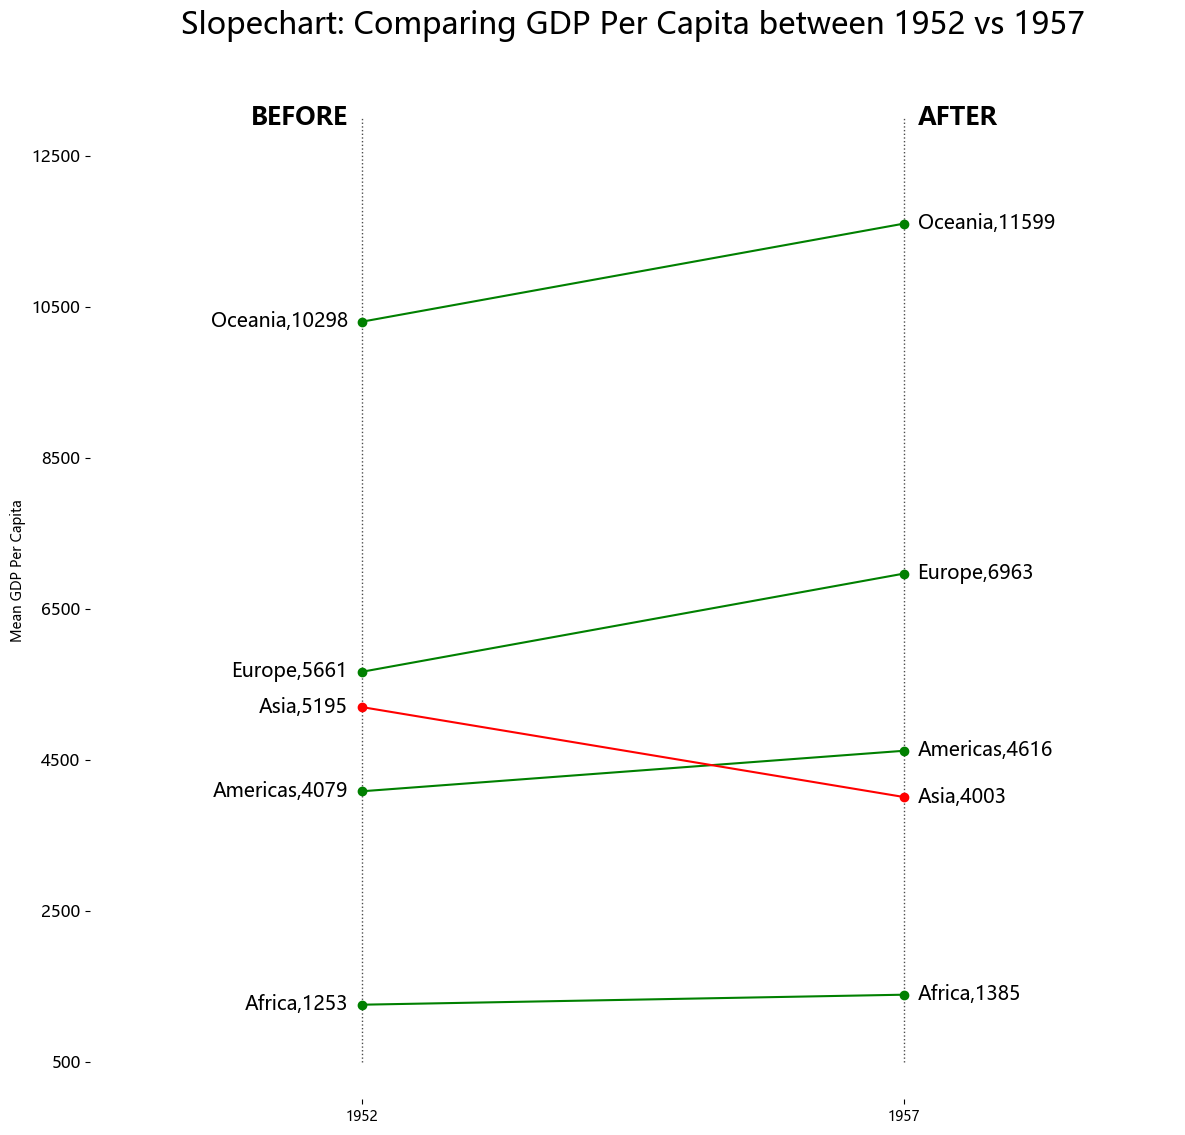

In [45]:
left_label = [str(c) +  ',' + str(round(y)) for c, y in zip(df.continent, df[ 1952 ])]#左边显示的字符串值
right_label = [str(c) +  ',' + str(round(y)) for c, y in zip(df.continent, df[ 1957 ])]#右边显示的字符串值
klass = [ 'red'  if (y1-y2) < 0 else  'green'  for y1, y2 in zip(df[1952], df[ 1957])] #有增长则是绿色，没有则是红色

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color= 'black' ):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color= 'red'  if p1[1]-p2[1] > 0 else  'green' , marker= 'o' , markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 100)
# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color= 'black' , alpha=0.7, linewidth=1, linestyles= 'dotted' )
ax.vlines(x=3, ymin=500, ymax=13000, color= 'black' , alpha=0.7, linewidth=1, linestyles= 'dotted' )

# Points
ax.scatter(y=df[ 1952 ], x=np.repeat(1, df.shape[0]), s=10, color= 'black' , alpha=0.7)
ax.scatter(y=df[ 1957 ], x=np.repeat(3, df.shape[0]), s=10, color= 'black' , alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df[ 1952 ], df[ 1957 ], df['continent' ]):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c +  ','+ str(round(p1)), horizontalalignment= 'right' , verticalalignment= 'center' , fontdict={ 'size' :14})
    ax.text(3+0.05, p2, c +  ','+ str(round(p2)), horizontalalignment= 'left' , verticalalignment= 'center' , fontdict={ 'size' :14})
    
#  Before  and  After  Annotations
ax.text(1-0.05, 13000, 'BEFORE' , horizontalalignment= 'right' , verticalalignment= 'center' , fontdict={ 'size' :18,  'weight' :700})
ax.text(3+0.05, 13000, 'AFTER' , horizontalalignment= 'left' , verticalalignment= 'center' , fontdict={ 'size' :18,  'weight' :700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size' :22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel= 'Mean GDP Per Capita' )
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()